# LIME image classifier

In [1]:
# from skimage.util import as_float

# # import cython
# import pyximport
# pyximport.install(setup_args={"script_args" : ["--verbose"]})

# from skimage.filters import gaussian
# from skimage2.utils import _supported_float_type
# from skimage.color import rgb2lab
# from skimage.util import img_as_float
# from skimage2._quickshift_cy import _quickshift_cython

In [5]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random
import rasterio
import numpy as np
import glob
from rasterio.plot import reshape_as_image
from tensorflow.keras import models

from LimeImageExplainer2 import LimeImageExplainer2


file = rasterio.open('Input/sentinel/patches_256/Iowa_July_1_31/test/Iowa_2021_july_1280-3072.tif')
img = reshape_as_image(file.read())
# file.close()
img_batch1 = np.expand_dims(img, axis=0)

img_batch = img_batch1[:,:,:,0:12]
# model_id = "aanaxs4g" # With mask
model_id = "ezb3xkqf" # No Mask
model_path = glob.glob("wandb/"+ "*"+model_id+"*" + "/files/model-best.h5")[0]

# print(model_path)
cnn_model = models.load_model(model_path)

In [6]:
explainer = LimeImageExplainer2(random_state=42)
explanation = explainer.explain_instance(
         img_batch,
         cnn_model.predict
)
# plt.imshow(img_batch[10])

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 84ms/step


In [7]:
image, mask = explanation.get_image_and_mask(
         cnn_model.predict(
              img_batch).argmax(axis=1)[0],positive_only=True,hide_rest=False)
# plt.imshow(mark_boundaries(image, mask))

1/1 [==============================] - 0s 20ms/step


In [8]:
print(image[:,:,0:3].shape)
print(mask.shape)

(256, 256, 3)
(256, 256)


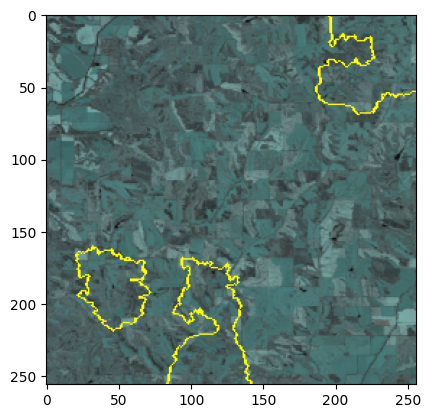

In [9]:
plt.imshow(mark_boundaries(image[:,:,5:8], mask))

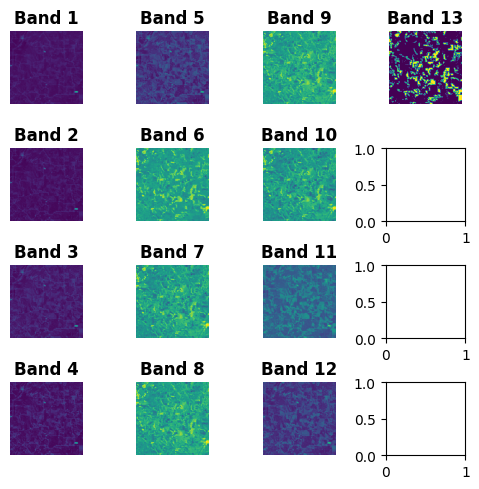

In [27]:
from rasterio.plot import show
fig, ax = plt.subplots(4,4,figsize=(5,5))

col = 0 
row = 0
for i in range(1,file.count+1):
#     print(row,col)
    
    show((file,i),ax = ax[row,col],title = "Band "+str(i))
    ax[row,col].axis("off")
    row+=1
    if i >= 4 and i %4==0:
        row = 0
        col+=1
#     col+=1
plt.tight_layout()
file.close()

# LIME for Tabular data